<a href="https://colab.research.google.com/github/iyadh97/Project-2/blob/main/Project_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the [original dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download)

# **Project 2 - Part 2 :**

We will clean and explore the data set in this part.

* Deleted unnecessary columns.
* Deleted duplicate rows.
* Identified and addressed missing values.
* Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produced univariate visuals for the target and all features.
* Identified outliers.
* Clearly commented all of your cleaning steps and described any decisions you made.

-----------------------------------------
-----------------------------------------
# <font color='green'>**Introduction**


-----------------------------------------
-----------------------------------------




A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.



## **1.1 Data description**
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.



## **1.2 Features Description**
### **1. Categorical Attributes**

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  * Individual work category
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  * Individual's highest education degree
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  * Individual marital status
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  * Individual's occupation
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  * Individual's relation in a family
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  * Race of Individual
* gender: Female, Male.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  * Individual's native country

### **2. Continuous Attributes**

* age: continuous.
  * Age of an individual
* fnlwgt: final weight, continuous.
  * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
  * Individual's working hour per week



-----------------------------------------

# <font color='pink'>**Clarification about some features**

-----------------------------------------




* **`"Workclass"`** is a categorical feature used in the field of machine learning and data mining. It represents the type of organization or occupation that a person is employed in. The possible values for workclass include: Private: employee of a private company Self-emp-not-inc: self-employed individuals such as small business owners like a pharmacy or a small shop Self-emp-inc: self-employed individuals with higher income such as large corporations Federal-gov: federal government employee Local-gov: local government employee State-gov: state government employee Without-pay: individual without income Never-worked: individual who has never worked before

  * **This feature is important in income prediction models, as the type of occupation and organization that a person is employed in can have an impact on their income.**


**`Weighting data`** in a sample is commonly used to provide a better estimate of the population. For example, if a particular group with a smaller number of individuals from the population is underrepresented in the sample, it may also be underrepresented in the final estimate. Therefore, by assigning a weight to each individual in the sample, a better estimate for features such as income, education, age, and gender can be obtained.

* In machine learning models, **`"fnlwgt"`** is also used as one of the input features in predicting income and other demographic features of the population.

* **`"Capital-gain"`** is a feature in financial and economic datasets that represents the profit earned by an individual or business through the sale of a capital asset such as stocks, bonds, or real estate. Capital gain is calculated as the difference between the sale price of the asset and its original purchase price.

  * In machine learning models, capital gain is often used as a predictor of income, as individuals with higher capital gains tend to have higher incomes. This feature can also be used to predict other financial behaviors, such as investment decisions and risk-taking behavior.Capital gain is an important feature in financial analysis and modeling, as it can provide insights into the overall financial health and performance of individuals and businesses.

## **1.3 Objective of this project**

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

-----------------------------------------
-----------------------------------------
# <font color='green'>**Solution**


-----------------------------------------
-----------------------------------------



## **Import Libraries**

In [1]:
## standard imports
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import missingno

## Regression Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
# Set pandas as the default output for sklearn
set_config(transform_output='pandas')

## set pandas to display more columns
pd.set_option('display.max_columns',100)

#suppressing scientific notation, add comma & round 2 decimal pts
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")


## **Functions**

In [2]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=1, figsize=(12,8))

  # choosing final context
  sns.set_context('paper')

  #plot the histogram
  df[col].hist(edgecolor='k')
  # sns.histplot(data=df,x = col,ax = axes) # another way to plot using seaborn

  mean_value = df[col].mean()
  axes.axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",lw=2);

  med_value = df[col].median()
  axes.axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}",lw=2);

  axes.legend();

  ## Updating title of top graph
  axes.set_title(f'EDA for {col}',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')
  plt.ylabel('Count', fontsize = 16,fontweight='bold')
  plt.xlabel(col, fontsize = 16,fontweight='bold')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()


def cat_univ_vis(data,feature,rotaion=0,fig=(12,8),axs=0):

  plt.figure(figsize=fig)

  total = float(len(df["income"]) )

  if axs == 0:
    ax = sns.countplot(x=feature, data=data)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",weight='bold')

  else :
    ax = sns.countplot(y=feature, data=data)


  plt.xlabel(feature, fontsize = 14,fontweight='bold')
  plt.title(f'Distribution of {feature}',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')

  plt.xticks(rotation=rotaion);
  plt.show()

## **Loading Dataset**

In [3]:
filepath='/content/adult.csv'

df=pd.read_csv(filepath)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country".**

## <font color='yellow'>**Prepare/clean the data for exploratory analysis purposes**

In [4]:
df_copy = df.copy()

In [5]:
df.shape

(48842, 15)

* This shows that we have 48842 observation and 15 attributes including target attribute(income).

In [6]:
print(df.info())
print(('-'*40))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*40))
print(f'Missing values :\n\n{df.isna().sum()} ')
print(f'\n----There are {df.isna().sum().sum()} missing Values----')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
----------------------------------------
There are 52 duplicate rows.
-

* The dataset does contain 52 duplicated rows that need to be dropped.

* Missing Values:
 There are no clear missing values in this Dataset, but all the missing values are present in the form of "?" as we said above.


In [7]:
# remove duplicates
df.drop_duplicates(inplace = True)
#Verify the result
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Remove the some unnecessary features**

In [8]:
df['fnlwgt'].nunique()

28523

In [9]:

#dropping fnlwgt due to high cardinality(too many unique values)
df.drop(columns=['fnlwgt'],inplace=True)



> I droped the 'fnlwgt' column due to high cardinality, (28219 is a high number of unique labels or classes out of 48842). High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.

In [10]:
#dropping the columns educational-num and race due to high cardinality(too many unique values)
df.drop(columns=['educational-num','race'],inplace=True)

We removed the "educational-num" and "race" columns as they were irrelevant for the prediction task since they had no impact on the target variable.

* We dropped the "educational-num" column because it duplicated information already present in the "education" column, simplifying our dataset.

* We also removed the "race" column to avoid introducing potential bias and ensure a fair and unbiased prediction model.

In [11]:
#confirming columns was dropped
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

### **Deal with Data Types**

In [12]:
df.sample(5)

,age,workclass,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
42246,28,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,0,0,38,United-States,<=50K
7939,20,Private,HS-grad,Never-married,Sales,Unmarried,Male,0,0,35,United-States,<=50K
32861,35,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
19180,22,Private,HS-grad,Divorced,Tech-support,Unmarried,Female,0,0,30,Germany,<=50K
14857,33,Private,HS-grad,Never-married,Craft-repair,Own-child,Male,0,0,43,United-States,<=50K


In [13]:
df.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

* **All data types in the dataset are suitable and require no modifications**

### **Deal with missing values**
Here the dataset is not using the default nan string for missing values, instead "?" is used

Hence we check occurrences of "?" in each column

In [14]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2795
5.73%


occupation
2805
5.75%


native-country
856
1.75%




* **All three columns are categorical columns. It takes much more extra work to estimate values for the missing entries.**

* Since the "workclass" and "occupation" columns have a substantial number of missing values (5.73% and 5.75% respectively), dropping these rows (listwise deletion) might result in a significant loss of data.

  * Instead, a reasonable approach could be to impute them using the mode (most frequent value) of the respective columns.
  * Mode imputation is a standard approach for categorical variables and maintains the categorical nature of the variables.

* **Considering the relative low portion of missing data in the Native-country column, we will drop rows with missing data.**

In [15]:
# Replace "?" with NaN for easier handling
df.replace('?', pd.NA, inplace=True)

# Impute "workclass" and "occupation" with the mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Drop rows with missing values in "native-country"
df.dropna(subset=['native-country'], inplace=True)

**Let's look the data it again** :

In [16]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,Female,0,0,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,Male,0,0,10,United-States,<=50K


In [17]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,Female,0,0,30,United-States,0


### **Checking for inconsistencies in categorical columns and their counts**

In [18]:
#creating a list of object columns
categorical_columns = list(df.select_dtypes(include='object'))

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in {column}:\n {unique_values}")


Unique values in workclass:
 ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in education:
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']

Unique values in marital-status:
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in occupation:
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

Unique values in relationship:
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Unique values in gender:
 ['Male' 'Female']

Unique values in native-country:
 ['United-States' 'Peru' 'Guatemala' 'Mexico' '

### **Deal with categorical columns**
To fit the data into prediction model, we need convert categorical values to numerical ones.

Before that, we will evaluate if any transformation on categorical columns are necessary.

Discretisation is a common way to make categorical data more tidy and meaningful.

In [19]:
df['education'].replace(['Preschool','10th','11th','12th','1st-4th','5th-6th','7th-8th','9th'],
                        ['dropout','dropout','dropout','dropout','dropout','dropout','dropout','dropout'],inplace=True)

df['education'].replace(['HS-Grad','HS-grad'],
                        ['HighGrad','HighGrad'],inplace=True)

df['education'].replace(['Some-college','Assoc-acdm','Assoc-voc'],
                        ['CommunityCollege','CommunityCollege','CommunityCollege'],inplace=True)

df['education'].replace(['Prof-school'],
                        ['Masters'],inplace=True)


print(f"\nUnique values in education column are : \n{df['education'].value_counts()}")




Unique values in education column are : 
HighGrad            15573
CommunityCollege    14324
Bachelors            7803
dropout              6286
Masters              3386
Doctorate             562
Name: education, dtype: int64


In [20]:
df['marital-status'].replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

print(f"\nUnique values in education column are : \n{df['marital-status'].value_counts()}")



Unique values in education column are : 
not married    25345
married        22589
Name: marital-status, dtype: int64


### **Checking for any outliers or odd values in the data**

* We will now view use df.describe() to view the summary statistics for the numeric features.

In [21]:
# Obtain summary statistics of numerical columns
summary_stats = df.describe().round(3)

# Display the summary statistics
summary_stats

,age,capital-gain,capital-loss,hours-per-week,income
count,"47,934.00","47,934.00","47,934.00","47,934.00","47,934.00"
mean,38.65,"1,068.17",87.46,40.41,0.24
std,13.73,"7,377.10",402.89,12.39,0.43
min,17.00,0.00,0.00,1.00,0.00
25%,28.00,0.00,0.00,40.00,0.00
50%,37.00,0.00,0.00,40.00,0.00
75%,48.00,0.00,0.00,45.00,0.00
max,90.00,"99,999.00","4,356.00",99.00,1.00


### **Summary of attributes explain following things:**

**For Age :**

1. The mean value is 38 i.e. on an average the value of age attribute is 38.
2. Age is having the standerd deviation 13.73 which indicates the deviation of an observation from the mean.
3. The value of Age attribute varies from 17 to 90.
4. The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5. 3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
6. The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
7. The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

**For capital-gain :**

1. For capital-gain, the mean is 1068.17 and median is 0, which indicates that the distribution is highly right skewed.
2. From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
3. capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7377.10).
4. capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

**For capital-loss :**

1. This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
2. Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).

**For hours-per-week :**

1. This attribute means number of working hours spend by an individual in a week.
2. In this data the hours per week atrribute varies within the range of 1 to 99.
3. 75 percentage of the people spend 45 or less working hours per week.
4. The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
5. Observations are very sparse below 25th percentile and after 75th percentile.
6. Using quartiles we can say that data is approximately symmetric.
7. Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.


In [22]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,gender,native-country
count,47934,47934,47934,47934,47934,47934,47934
unique,8,6,2,14,6,2,41
top,Private,HighGrad,not married,Prof-specialty,Husband,Male,United-States
freq,36011,15573,25345,8760,19358,32006,43792


* `Native-country` has maximum number of unique categories i.e. 41 categories.
But the native-country is highly biased toward the US which has frequency of 43792 out of total 47934(nearly 91.35%).

* `Occupation` has more uniform distribution of categories as comparerd to the other attributes.There is no dominant or highly prevalent category that significantly outweighs the others. Instead, the data is spread relatively evenly among the various categories or occupations.

* The top category in `workclass` is Private having frequency(36011) and percentage(75.12%).
* The top category in `gender` is Male having frequency(32006) and percentage(66.77%).

**After analyzing the df.describe() summary for the dataset, it appears that all values fall within reasonable bounds, and there are no noticeable outliers.**

-----
-----
## **EDA**
-----
------

### **Univariate analysis for numeric features**


* **Age**
  1. **Distribution**

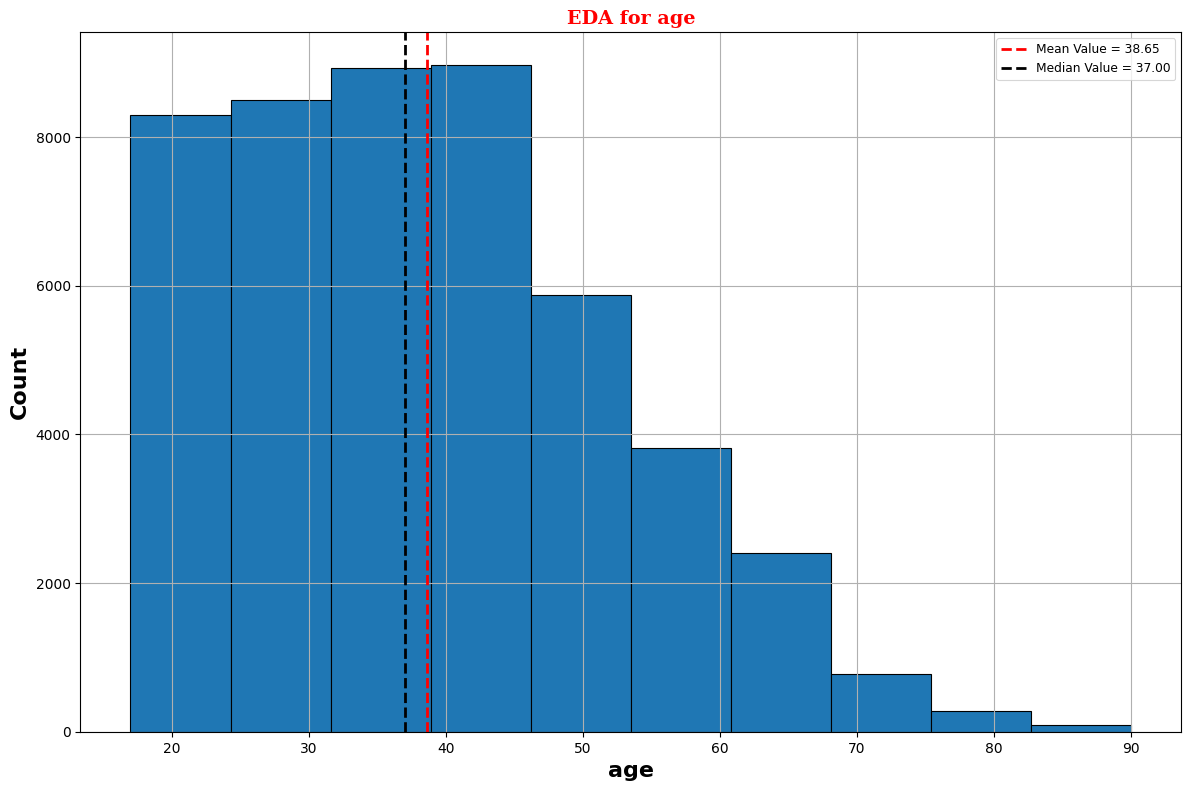


Total Ages above 70yo are: 858


In [23]:
plot_numeric(df,'age')

print(f'\nTotal Ages above 70yo are: {df[df["age"]>70].shape[0]}')

2. **Description about the distribution**

The above histogram shows that :

> "age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

* **Hours per week**
  1. **Distribution**

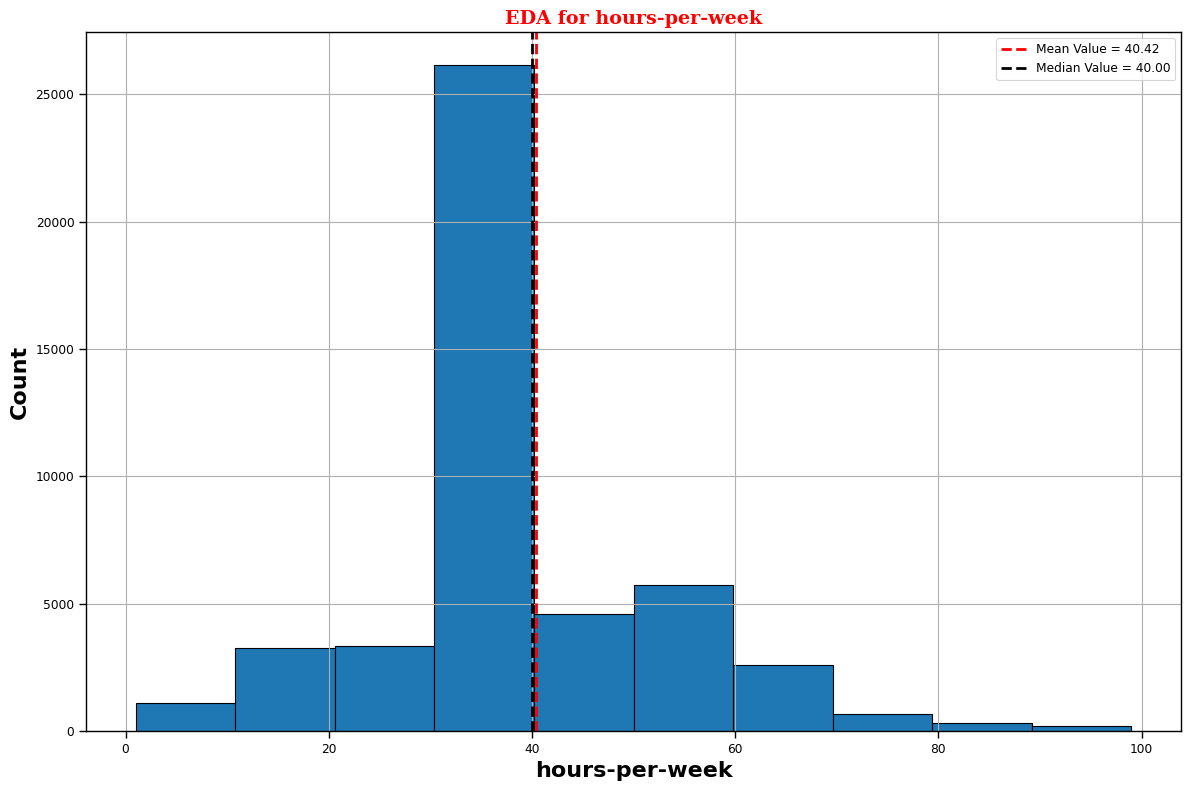

In [24]:
plot_numeric(df,'hours-per-week')

2. **Description about the distribution**

This histogram of "hours-per-week" shows that:

> In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are roughly 27,000 people.
There are also few people who works 80-99 hours per week and some less than 20 which is unusual.
75 percentage of the people spend 45 or less working hours per week.

* **capital-gain**
  1. **Distribution**

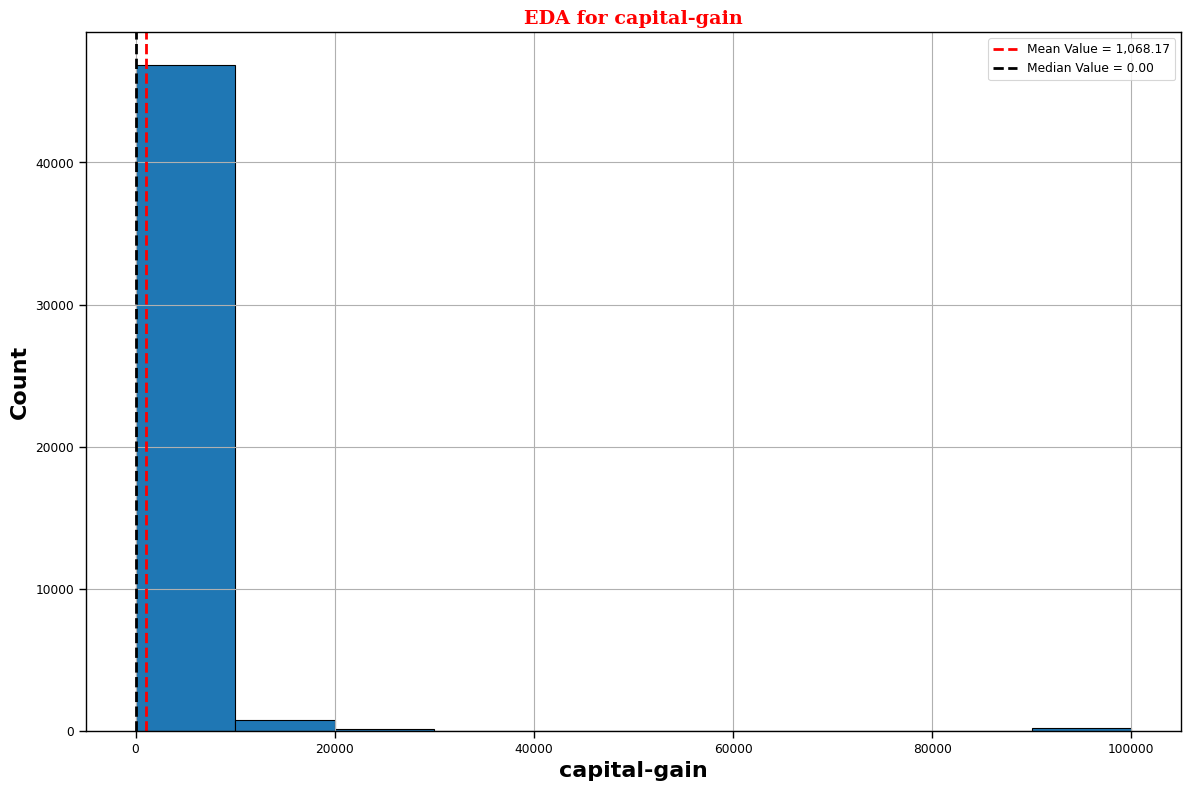

In [25]:
plot_numeric(df,'capital-gain')

2. **Description about distribution**

> This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.

> capital-gain is concentrated on the one particular value and other are spread with large standard deviation(7377.10).

> capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

* **capital-loss**
  1. **Distribution**

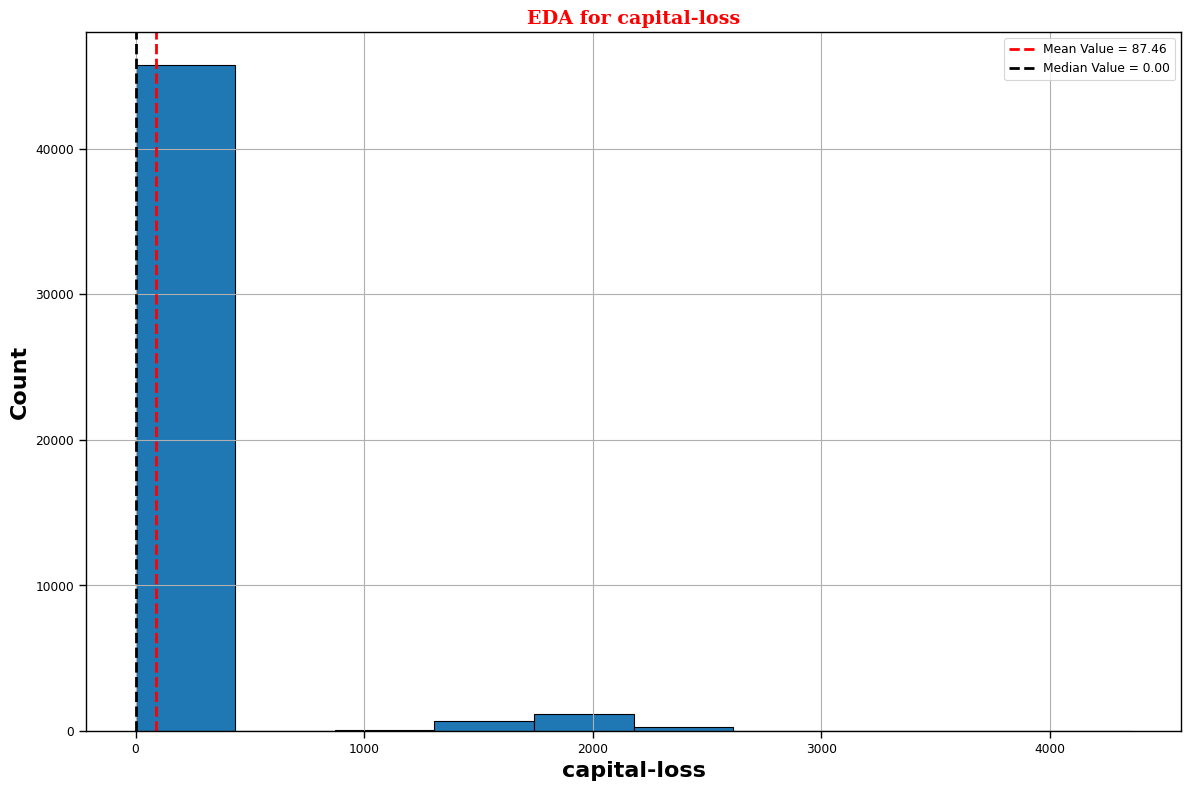


Total number of persons having a capital-loss above 0: 2239


In [26]:
plot_numeric(df,'capital-loss')

print(f'\nTotal number of persons having a capital-loss above 0: {df[df["capital-loss"]>0].shape[0]}')


2. Description about distribution

> This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2239).

> This attribute is similar to the capital-gain i.e. most of the values are centered on 0(around 45000 of them)

* **Relation between capital gain and capital loss**

  1. Let's explore more about capital loss and capital gain.

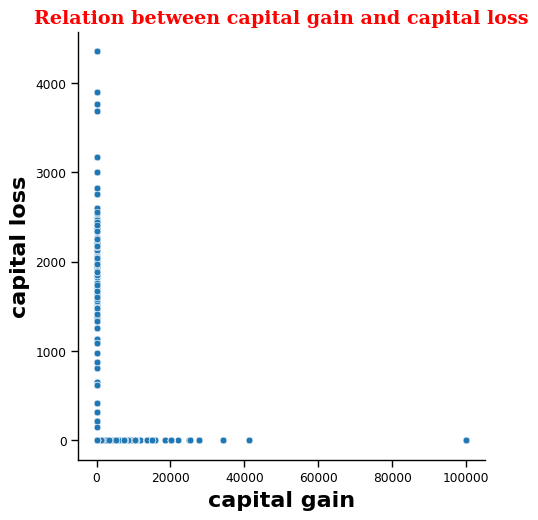

In [27]:
sns.relplot(data= df,x='capital-gain',y='capital-loss')

plt.ylabel('capital loss', fontsize = 16,fontweight='bold')
plt.xlabel('capital gain', fontsize = 16,fontweight='bold')
plt.title('Relation between capital gain and capital loss',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')
plt.show()

2. Possibilities for capital gain and capital loss

> Both capital gain and capital loss can be zero
> If capital.gain is zero there is possibility of capital loss being high or above zero.
> If capital loss is zero there is possibility of capital.gain being high or above zero.

**With the help of this, we can do one modification later(It could be combine these together : `capital-change = [capital-gain - capital-loss])`**

-----

### **Univariate analysis for categorical features**

* **Workclass**
  1. **Distribution**

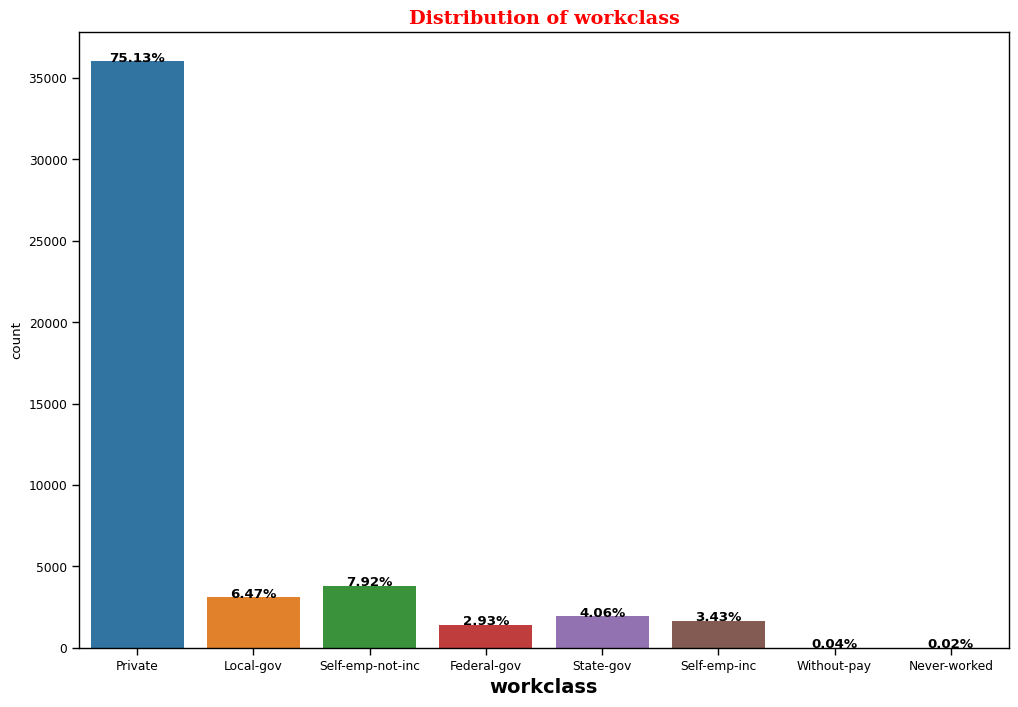

In [28]:
cat_univ_vis(df,'workclass')

2. **Description about distribution**

Summary distribution shows that:

* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the private workclass(36011) i.e. 75.13%.
* without-pay and never-worked has minimum count in workclass attribute(less than 5%).
* There is huge imbalance in the categories of workclass attribute.

* **Education**
  1. **Distribution**

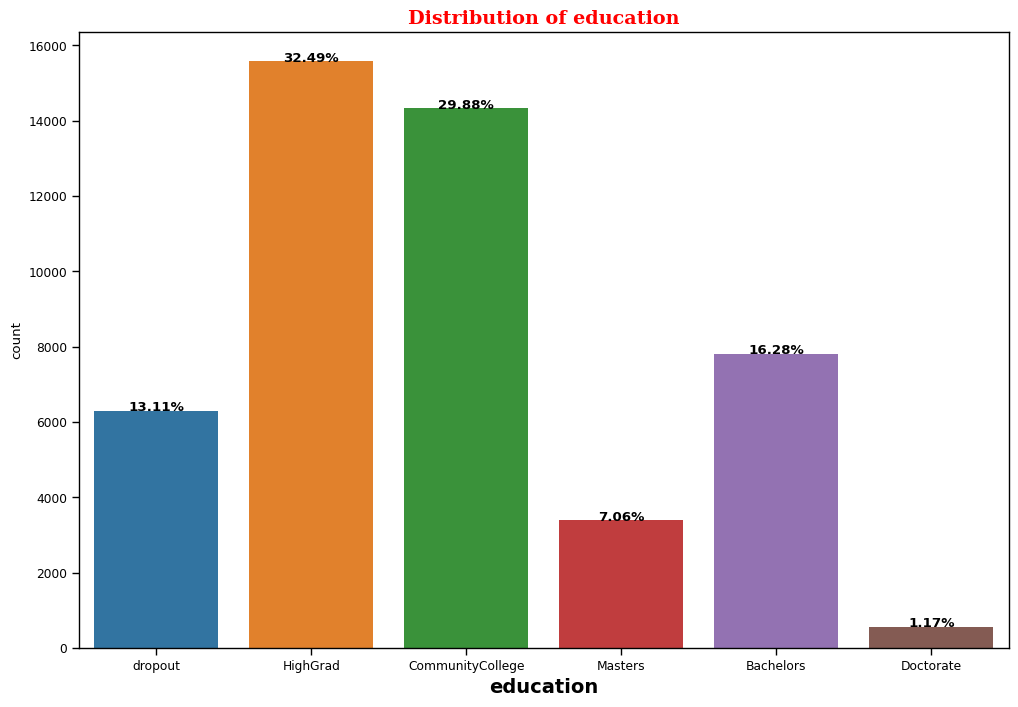

In [29]:
cat_univ_vis(df,'education')

2. **Description about distribution**

* There are 6 unique categories present in the education attribute(after modification).
* HighGrad has 32.49% of all the education attribute.
* HighGrad (15573) has the maximum number of observations followed by CommunityCollege(14324) and Bachelors(7803).
* Doctorate has the minimum number with only 562 having a doctorate (1.17%).

* **marital-status**
  1. **Distribution**

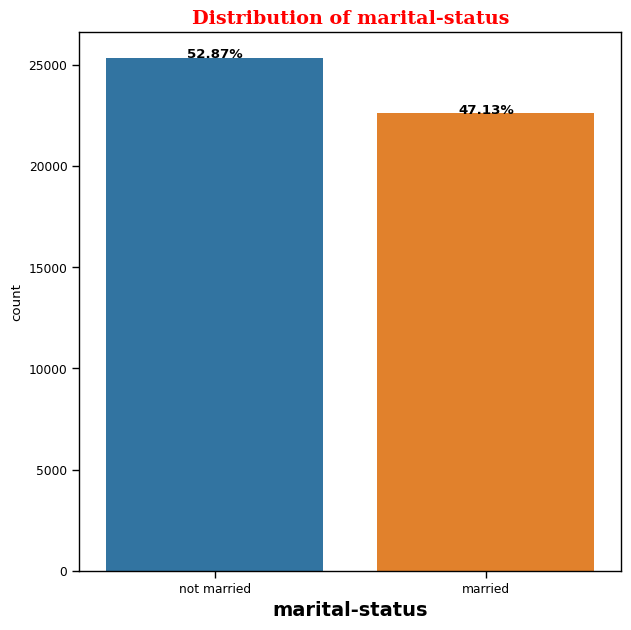

In [30]:
cat_univ_vis(df,'marital-status',0,(7,7))

2. **Description about distribution**

* This marital-status attribute has 2 unique categories(after modification).

*  The `not married` people represent the dominant category with 25345 (52.87%)

* `married` people are slightly less in number with 22589 (47.13%).


* **Occupation**
  1. **Distribution**

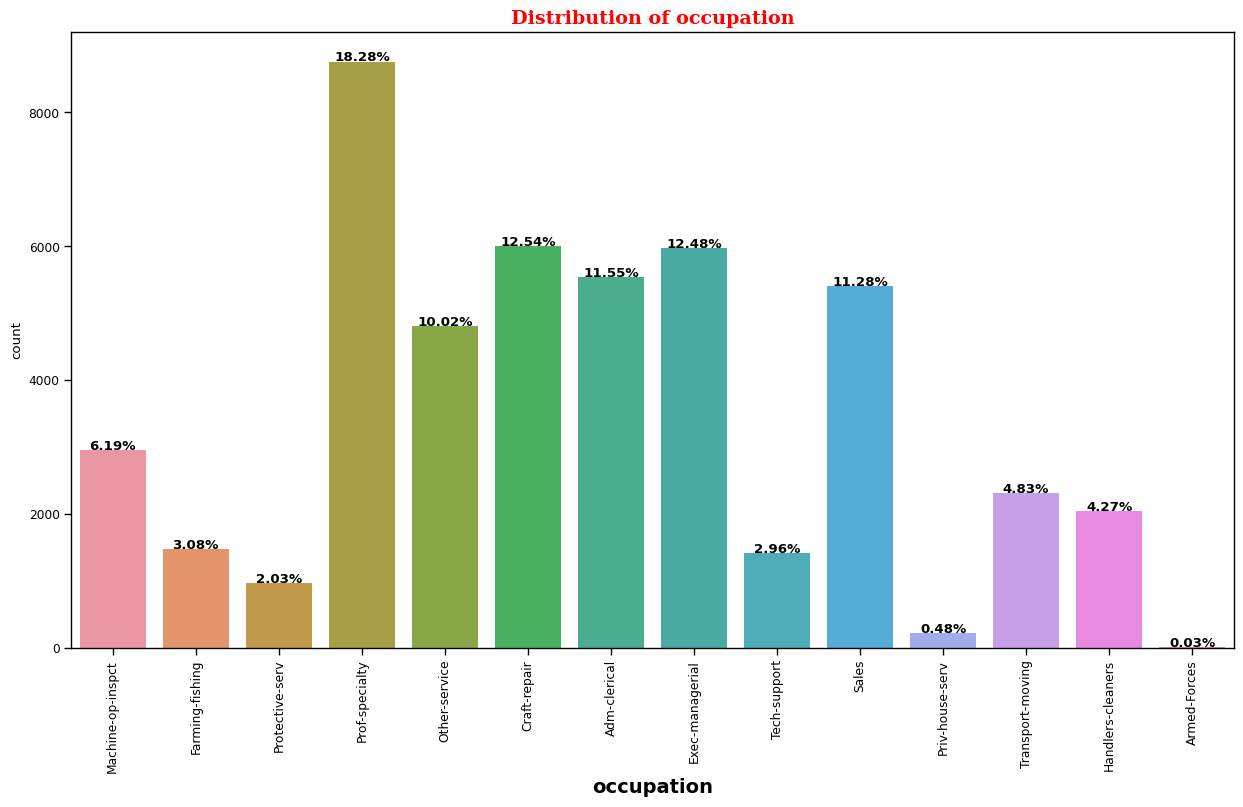

In [31]:
cat_univ_vis(df,'occupation',90,(15,8))

2. **Description about distribution**

* There are 14 unique categories present in the occupation attribute.
* Prof-specialty has the maximum count(8760) but Craft-repair, Exec-managerial, Adm-clerical and Sales has comparable number of observations (very close numbers and %).
* Armed-Forces has minimum samples in the occupation attribute with only 14 (0.03%).

* **Relationship**
  1. **Distribution**

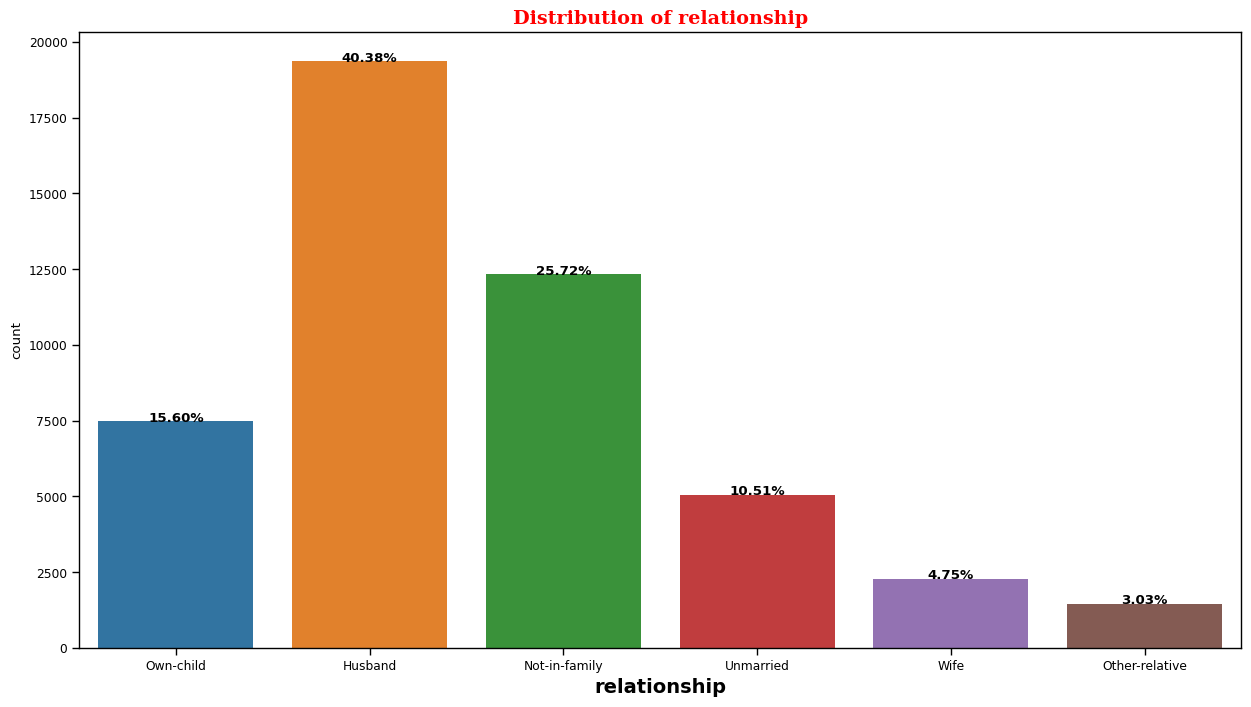

In [32]:
cat_univ_vis(df,'relationship',0,(15,8))

2. **Description about distribution**

* There are 6 unique categories in the relationship attribute.
* Husband has maximum percentage (40.38%) among all categories followed by not-in-family(25.72%)

* **Gender**
  1. **Distribution**

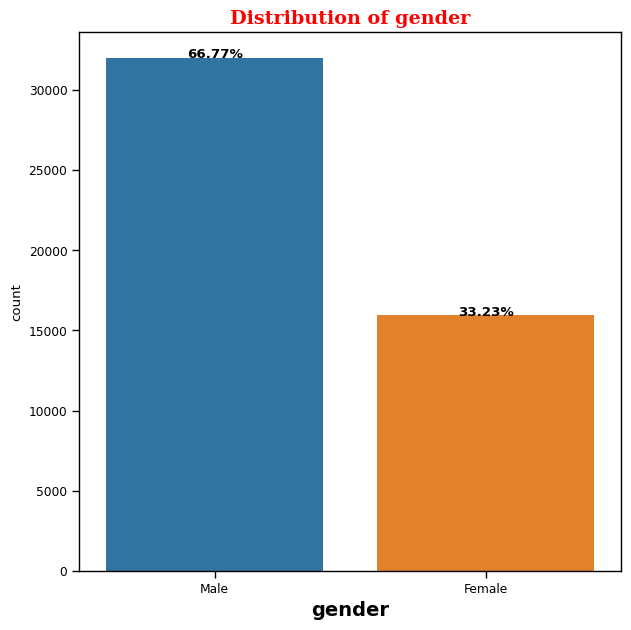

In [33]:
cat_univ_vis(df,'gender',0,(7,7))

2. **Description about distribution**

This distribution explains that:

* Gender has 2 unique categories(Male and Female).
* But the frequency of male(32006) is higher than the female(15928) categories.
* Distribution shows that this dataset is skewed toward the male with nearly 67%.

* **Native-country**
  1. **Distribution**

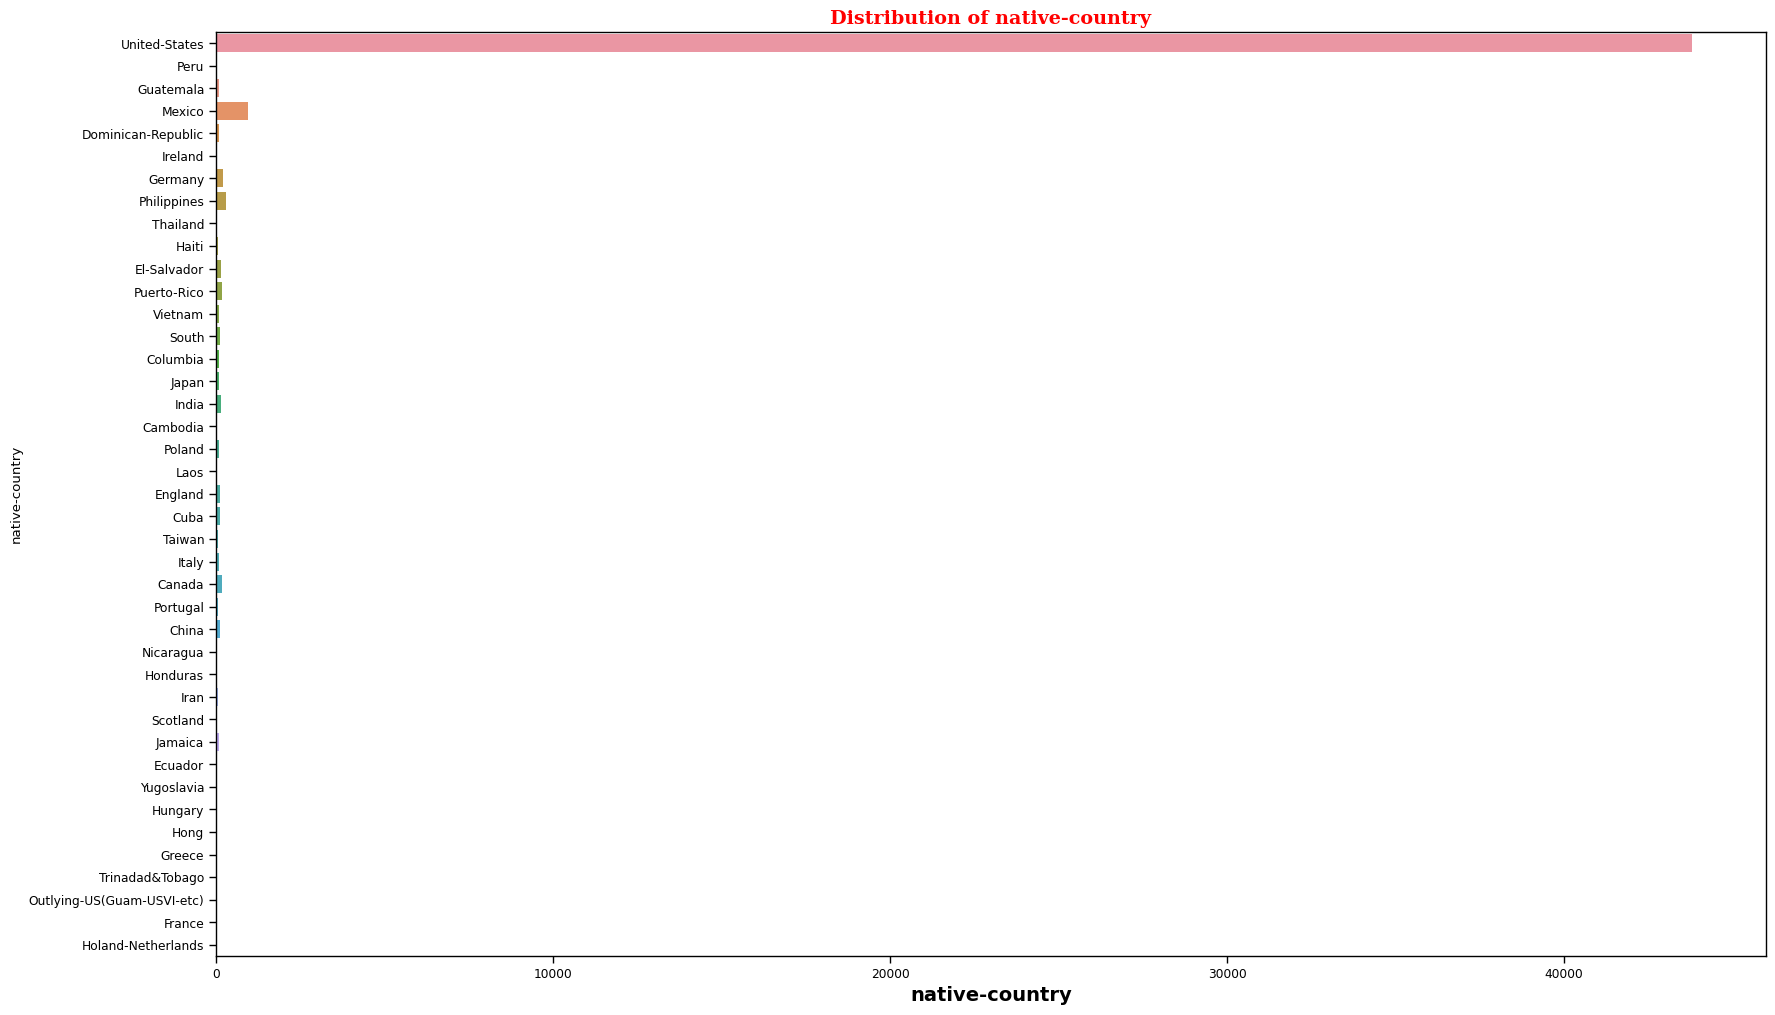

In [34]:
cat_univ_vis(df,'native-country',0,(20,12),1)

2. **Description about distribution**

This distribution explains that:

This dataset is **taken from the US**.
As 43792 of them (**`91.35%`**) have native country America and others are immigrants.


--------

* **Income(Target variable)**
  1. **Distribution**

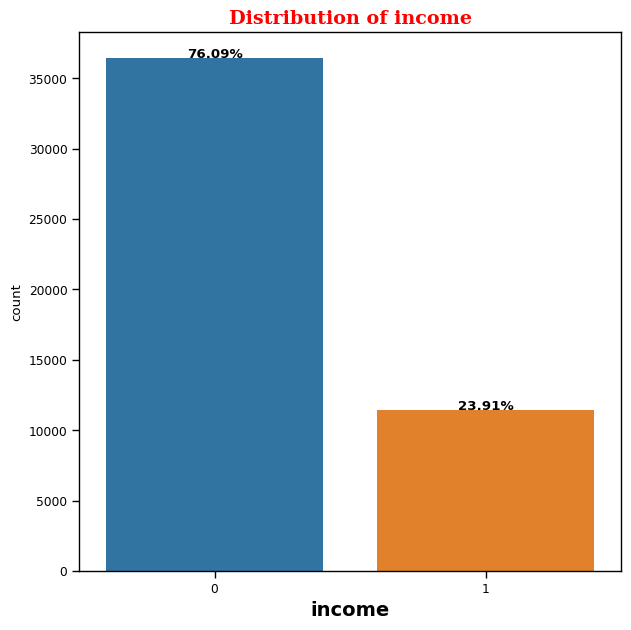

In [35]:
cat_univ_vis(df,'income',0,(7,7))

2. **Description about distribution**

This distibution says that:

> This dataset not balance , i.e. 23.91%of them are belong to income group 1 (who earns more than 50k) and 76.09% fall under the income group 0 (who earns less than 50k).